In [1]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

In [2]:
import riskModel as model

In [3]:
theta0 = np.linspace(0.001, 1.99*np.pi, 100)

In [4]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[0, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[50, ...])
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim = 0.05*np.pi, sigma_rep = 0.05))[99, ...])

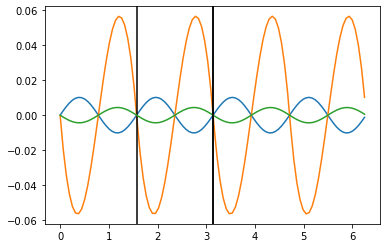

In [5]:
E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.5, 0.01)
plt.plot(theta0, theta0 - E_theta_given_theta0)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.01, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')
plt.axvline(0.5*np.pi, c='k')


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, 0.75, 0.05)
plt.plot(theta0, theta0 - E_theta_given_theta0)
plt.axvline(np.pi, c='k')

In [279]:
sigma_stim = 0.02*np.pi
sigma_rep = 0.01

In [280]:
# plt.plot((model.bayesian_decoding(theta0 ,sigma_stim, sigma_rep))[0, ...])

In [281]:
safe_value, safe_prob = model.safe_value_dist((61./180.)*np.pi, sigma_stim, sigma_rep , type = "prior", bins=100)

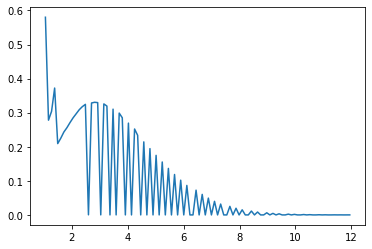

In [282]:
safe_value

plt.plot(safe_value,safe_prob[0,:])

In [283]:
risky_value, risky_prob = model.risky_value_dist((61.0/180.)*np.pi, sigma_stim, sigma_rep , risk_prob = 0.75, type = "prior", bins=100) 

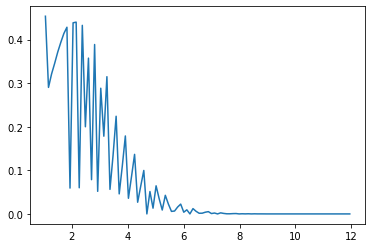

In [284]:
plt.plot(risky_value,risky_prob[0,:])

In [285]:
model.diff_dist(safe_value, risky_prob, safe_prob)

array([[0.32321954]])

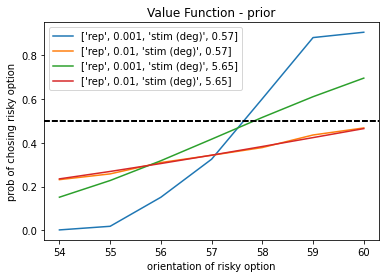

In [362]:
rangePrior1 = np.linspace(54./180., 60./180., 7)
rangePrior2 = np.linspace(61./180., 67./180., 7)
rangePrior3 = np.linspace(68./180., 77./180., 10)
rangePrior4 = np.linspace(78./180., 87./180., 10)

rangeOri = rangePrior1


sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0]*np.pi, sigma_stim, sigma_rep , type = "prior", bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri)*np.pi, sigma_stim, sigma_rep , risk_prob = 0.75, type = "prior", bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        plt.plot(rangeOri*180.0, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - prior")
        plt.axhline(0.5, c='k', ls='--')
    
    

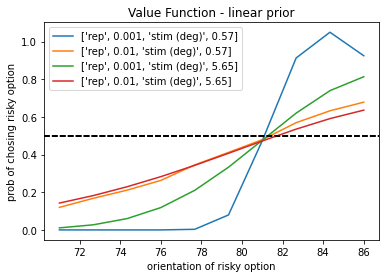

In [366]:
rangeLinear1 = np.linspace(48./180., 51./180., 7)
rangeLinear2 = np.linspace(52./180., 58./180., 7)
rangeLinear3 = np.linspace(59./180., 70./180., 10)
rangeLinear4 = np.linspace(71./180., 86./180., 10)

rangeOri = rangeLinear4


sigma_stim_list = [0.001*np.pi,0.01*np.pi]
sigma_rep_list = [0.001, 0.01]

for sigma_stim in sigma_stim_list:
    for sigma_rep in sigma_rep_list:

        safe_value, safe_prob = model.safe_value_dist(rangeOri[0]*np.pi, sigma_stim, sigma_rep , type = "linearPrior", bins=100)
        risky_value, risky_prob = model.risky_value_dist((rangeOri)*np.pi, sigma_stim, sigma_rep , risk_prob = 0.75, type = "linearPrior", bins=100) 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)
        plt.plot(rangeOri*180.0, np.squeeze(p_chose_risky), label=['rep',sigma_rep, "stim (deg)",round(sigma_stim*180,2)])
        plt.legend()
        plt.xlabel("orientation of risky option")
        plt.ylabel("prob of chosing risky option")
        plt.title("Value Function - linear prior")
        plt.axhline(0.5, c='k', ls='--')
    
    